In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.express as px
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
credit_score = pd.read_csv("/content/drive/MyDrive/Redes_Neurais/Credit Score Classification Dataset.csv")

In [ ]:
credit_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 164 non-null    int64 
 1   Gender              164 non-null    object
 2   Income              164 non-null    int64 
 3   Education           164 non-null    object
 4   Marital Status      164 non-null    object
 5   Number of Children  164 non-null    int64 
 6   Home Ownership      164 non-null    object
 7   Credit Score        164 non-null    object
dtypes: int64(3), object(5)
memory usage: 10.4+ KB


In [ ]:
credit_score.head(5)

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High
1,30,Male,100000,Master's Degree,Married,2,Owned,High
2,35,Female,75000,Doctorate,Married,1,Owned,High
3,40,Male,125000,High School Diploma,Single,0,Owned,High
4,45,Female,100000,Bachelor's Degree,Married,3,Owned,High


In [ ]:
credit_score['Credit Score'].unique()

array(['High', 'Average', 'Low'], dtype=object)

In [ ]:
credit_score = credit_score[~credit_score['Credit Score'].str.contains('Average')]

In [ ]:
credit_score['Credit Score'].unique()

array(['High', 'Low'], dtype=object)

In [ ]:
credit_score.isnull().sum()

Age                   0
Gender                0
Income                0
Education             0
Marital Status        0
Number of Children    0
Home Ownership        0
Credit Score          0
dtype: int64

In [ ]:
credit_score.head(10)

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High
1,30,Male,100000,Master's Degree,Married,2,Owned,High
2,35,Female,75000,Doctorate,Married,1,Owned,High
3,40,Male,125000,High School Diploma,Single,0,Owned,High
4,45,Female,100000,Bachelor's Degree,Married,3,Owned,High
5,50,Male,150000,Master's Degree,Married,0,Owned,High
8,36,Female,80000,Master's Degree,Married,2,Owned,High
9,41,Male,105000,Doctorate,Single,0,Owned,High
10,46,Female,90000,High School Diploma,Married,1,Owned,High
11,51,Male,135000,Bachelor's Degree,Married,0,Owned,High


Quantificando as variaveis categóricas ordianais

In [ ]:
mapping = {'High': 1, 'Low': 0}
credit_score['Credit Score'] = credit_score['Credit Score'].map(mapping)

mapping = {'Owned': 1, 'Rented': 0}
credit_score['Home Ownership'] = credit_score['Home Ownership'].map(mapping)

mapping = {
    'High School Diploma': 1,
    "Associate's Degree" : 2,
    "Bachelor's Degree": 3,
    "Master's Degree": 4,
    "Doctorate": 5
}
credit_score['Education'] = credit_score['Education'].map(mapping)

In [ ]:
credit_score = credit_score[['Age', 'Income', 'Education',
       'Number of Children', 'Home Ownership', 'Credit Score']]

In [ ]:
credit_score.head(5)

,Age,Income,Education,Number of Children,Home Ownership,Credit Score
0,25,50000,3,0,0,1
1,30,100000,4,2,1,1
2,35,75000,5,1,1,1
3,40,125000,1,0,1,1
4,45,100000,3,3,1,1


In [ ]:
credit_score.corr()

,Age,Income,Education,Number of Children,Home Ownership,Credit Score
Age,1.000000,0.629114,0.108018,-0.161488,0.625316,0.569973
Income,0.629114,1.000000,0.129200,-0.098330,0.633115,0.675786
Education,0.108018,0.129200,1.000000,0.227614,0.424971,0.501959
Number of Children,-0.161488,-0.098330,0.227614,1.000000,0.346181,0.323021
Home Ownership,0.625316,0.633115,0.424971,0.346181,1.000000,0.872656
Credit Score,0.569973,0.675786,0.501959,0.323021,0.872656,1.000000


In [ ]:
df_home_ownership = credit_score[['Home Ownership', 'Credit Score']]
df_home_ownership.to_csv('df_home_ownership.csv')

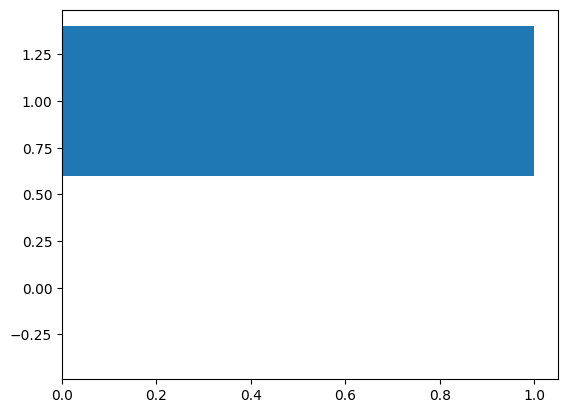

In [ ]:
import matplotlib.pyplot as plt

plt.barh(credit_score['Credit Score'], credit_score['Home Ownership'])
plt.show()

O PCA (Principal Component Analysis), ou Análise de Componentes Principais, é um algoritmo de redução de dimensionalidade comumente utilizado em análise de dados e aprendizado de máquina. A implementação do PCA envolve as seguintes etapas:

Pré-processamento dos dados: Antes de aplicar o PCA, é necessário pré-processar os dados. Isso envolve a padronização ou normalização dos dados, a fim de garantir que todas as variáveis tenham a mesma escala. Geralmente, subtrai-se a média dos dados e divide-se pelo desvio padrão.

Cálculo da matriz de covariância: Em seguida, é necessário calcular a matriz de covariância dos dados pré-processados. A matriz de covariância mostra as relações entre as diferentes variáveis e é usada para determinar os componentes principais.

Decomposição da matriz de covariância: A matriz de covariância é então decomposta usando métodos de álgebra linear, como a decomposição em valores singulares (SVD) ou a decomposição de autovalores e autovetores. Essa etapa resulta nas componentes principais.

Seleção das componentes principais: As componentes principais são classificadas em ordem decrescente de importância, com base em seus respectivos autovalores. As primeiras componentes principais capturam a maior parte da variância nos dados e são selecionadas para a redução de dimensionalidade.

Projeção dos dados: As componentes principais selecionadas são usadas para projetar os dados originais em um novo espaço de menor dimensão. Isso é feito multiplicando a matriz de dados pré-processados pela matriz de transformação formada pelas componentes principais selecionadas.

Opcional: Reconstrução dos dados originais: Se necessário, é possível reconstruir uma aproximação dos dados originais no espaço de alta dimensão. Isso pode ser útil para fins de visualização ou análise adicional.

É importante observar que o PCA é um algoritmo não supervisionado, o que significa que não leva em consideração rótulos ou informações de classe dos dados. Ele apenas busca identificar as direções principais de variação nos dados para reduzir a dimensionalidade.

#Padronizando as variáveis numéricas

In [ ]:
df_numerico = credit_score[["Age","Income","Education","Number of Children","Home Ownership"]]

In [ ]:
colunas_numericas = df_numerico.columns

In [ ]:
padronizar = StandardScaler()

In [ ]:
variaveis_numericas = padronizar.fit_transform(df_numerico)
variaveis_numericas

array([[-1.94436792, -1.29571992, -0.19892235, -0.88659264, -2.39517058],
       [-1.31108778,  0.25734825,  0.50835712,  1.29578924,  0.4175068 ],
       [-0.67780765, -0.51918584,  1.2156366 ,  0.2045983 ,  0.4175068 ],
       [-0.04452751,  1.03388234, -1.61348131, -0.88659264,  0.4175068 ],
       [ 0.58875263,  0.25734825, -0.19892235,  2.38698019,  0.4175068 ],
       [ 1.22203276,  1.81041642,  0.50835712, -0.88659264,  0.4175068 ],
       [-0.55115162, -0.36387902,  0.50835712,  1.29578924,  0.4175068 ],
       [ 0.08212852,  0.41265507,  1.2156366 , -0.88659264,  0.4175068 ],
       [ 0.71540865, -0.05326539, -1.61348131,  0.2045983 ,  0.4175068 ],
       [ 1.34868879,  1.34449597, -0.19892235, -0.88659264,  0.4175068 ],
       [-1.69105587, -1.76164038, -1.61348131, -0.88659264, -2.39517058],
       [-0.42449559, -0.67449265, -0.19892235,  1.29578924,  0.4175068 ],
       [ 0.20878455,  0.10204143,  0.50835712, -0.88659264,  0.4175068 ],
       [ 0.84206468, -0.2085722 ,  1.2

In [ ]:
dados_padronizados = pd.DataFrame(variaveis_numericas, columns= colunas_numericas)
dados_padronizados

,Age,Income,Education,Number of Children,Home Ownership
0,-1.944368,-1.295720,-0.198922,-0.886593,-2.395171
1,-1.311088,0.257348,0.508357,1.295789,0.417507
2,-0.677808,-0.519186,1.215637,0.204598,0.417507
3,-0.044528,1.033882,-1.613481,-0.886593,0.417507
4,0.588753,0.257348,-0.198922,2.386980,0.417507
...,...,...,...,...,...
123,1.602001,0.956229,-0.906202,-0.886593,0.417507
124,-1.437744,-1.994601,-1.613481,-0.886593,-2.395171
125,-0.171184,-0.907453,-0.198922,1.295789,0.417507
126,0.462097,-0.130919,0.508357,-0.886593,0.417507


In [ ]:
dados_padronizados.isnull().sum()

Age                   0
Income                0
Education             0
Number of Children    0
Home Ownership        0
dtype: int64

# Aplicando o PCA para todos os possíveis fatores

In [ ]:
n_fatores = dados_padronizados.shape[1]
n_fatores

5

In [ ]:
pca = PCA(n_components= n_fatores)
pca.fit(dados_padronizados)

PCA(n_components=5)

# Checando os Autovalores, Autovetores e a Variância explicada pelos fatores

In [ ]:
print("Auto-valores:")
print(pca.explained_variance_,'\n')

print("Auto-vetores:")
print(pca.components_,'\n')

print("Variância explicada:")
print(pca.explained_variance_ratio_,'\n')

Auto-valores:
[2.39869793 1.36813527 0.74018709 0.37257268 0.15977711] 

Auto-vetores:
[[-0.52213606 -0.53056714 -0.28951326 -0.0977849  -0.5937109 ]
 [ 0.33992084  0.28131076 -0.48802334 -0.72809222 -0.19243967]
 [-0.05560971 -0.11048694  0.8011527  -0.56605235 -0.14979745]
 [-0.67269062  0.7355441   0.02282023 -0.02598092 -0.07257021]
 [ 0.39525012  0.29347959  0.18880911  0.37313478 -0.76339284]] 

Variância explicada:
[0.47599162 0.27148934 0.14688087 0.07393239 0.03170577] 



In [ ]:
fatores = [f'F{i+1}' for i in range(n_fatores)]
fatores

['F1', 'F2', 'F3', 'F4', 'F5']

In [ ]:
fig = px.bar (x= fatores, y= pca.explained_variance_ratio_, text= np.around(pca.explained_variance_ratio_, decimals= 2), title= 'Scree Plot' )
fig.update_layout(yaxis = { 'title': 'Porcentagem de variância explicada', 'tickfont' : { 'size' : 15}},
                  xaxis= {'title' : 'Fatores', 'tickfont' : {'size' : 15}}, 
                  title = {'font' : {'size' : 25}})
fig.show()

In [ ]:
variancia_acumulada = [sum(pca.explained_variance_ratio_[0:i+1]) for i in range(n_fatores)]
variancia_acumulada

[0.47599162122123884,
 0.7474809646780431,
 0.8943618396150361,
 0.9682942298901172,
 1.0]

# Verificando os dois maiores Fatores

In [ ]:
pca = PCA(n_components= 1)
pca.fit(dados_padronizados)

PCA(n_components=1)

In [ ]:
fatores2 = [f'F{i+1}' for i in range(pca.n_components)]
fatores2

['F1']

In [ ]:
fig = px.bar (x= fatores2, y= pca.explained_variance_ratio_, text= np.around(pca.explained_variance_ratio_, decimals= 2), title= 'Scree Plot' )
fig.update_layout(yaxis = { 'title': 'Porcentagem de variância explicada', 'tickfont' : { 'size' : 15}},
                  xaxis= {'title' : 'Fatores', 'tickfont' : {'size' : 15}}, 
                  title = {'font' : {'size' : 25}})
fig.show()

In [ ]:
dados_padronizados.isnull().sum()

Age                   0
Income                0
Education             0
Number of Children    0
Home Ownership        0
dtype: int64

In [ ]:
pca = PCA(n_components= 1)
df_score = pca.fit_transform(dados_padronizados)
df_score = pd.DataFrame(df_score, columns=["F1"])

In [ ]:
df_score

,F1
0,3.269016
1,0.026263
2,0.009543
3,-0.219353
4,-0.867648
...,...
123,-1.242632
124,3.784826
125,0.253849
126,-0.480175


In [ ]:
df_score = pd.concat([df_score['F1'], credit_score['Credit Score']], axis=1)
df_score = df_score.dropna()
df_score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 0 to 127
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   F1            101 non-null    float64
 1   Credit Score  101 non-null    float64
dtypes: float64(2)
memory usage: 2.4 KB


In [ ]:
df_score

,F1,Credit Score
0,3.269016,1.0
1,0.026263,1.0
2,0.009543,1.0
3,-0.219353,1.0
4,-0.867648,1.0
...,...,...
121,-0.496444,1.0
123,-1.242632,1.0
124,3.784826,1.0
126,-0.480175,1.0


In [ ]:
df_score.to_csv("df_score.csv")